In [359]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC

In [360]:
df = pd.read_csv('coronavirus.csv')

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 21 columns):
Email                         1648 non-null object
Unnamed: 1                    1451 non-null object
contact.sunky@gmail.com       1652 non-null object
Unnamed: 3                    1648 non-null object
Email was incorrect before    1561 non-null object
Unnamed: 5                    1561 non-null object
Unnamed: 6                    1201 non-null object
Unnamed: 7                    1111 non-null object
Unnamed: 8                    657 non-null object
Unnamed: 9                    634 non-null object
Unnamed: 10                   594 non-null object
Unnamed: 11                   150 non-null object
Unnamed: 12                   419 non-null object
Unnamed: 13                   575 non-null object
Unnamed: 14                   1561 non-null object
Unnamed: 15                   1557 non-null object
Unnamed: 16                   1561 non-null object
Unnamed: 17                   15

The info method does not give explanitory information for this dataset since the column names are not shown

In [362]:
df.head()

,Email,Unnamed: 1,contact.sunky@gmail.com,Unnamed: 3,Email was incorrect before,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
1,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,1/3/2020,0,...,12/29/2019,1/4/2020,NaN,1,0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0,...,NaN,1/12/2020,NaN,0,1,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,1/4/2020,0,...,NaN,1/3/2020,NaN,0,1,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [363]:
#rename the column names
df.rename(columns={'Unnamed: 16': 'Death', 'Unnamed: 6': 'Gender', 'Unnamed: 7': 'Age'}, inplace=True)

In [364]:
#select interested columns
selected_df = df[['Gender', 'Age', 'Death']]

In [365]:
selected_df.Death.value_counts()

0            1490
1              42
2/23/2020       5
2/26/2020       4
3/1/2020        3
2/25/2020       2
2/22/2020       2
2/19/2020       2
2/27/2020       2
2/21/2020       2
2/28/2020       1
2/29/2020       1
death           1
2/24/2020       1
2/1/2020        1
2/13/2020       1
2/14/2020       1
Name: Death, dtype: int64

In [366]:
selected_df.Age.value_counts()

55     95
65     75
45     58
75     52
25     44
       ..
6       1
96      1
84      1
age     1
17      1
Name: Age, Length: 90, dtype: int64

In [367]:
selected_df.Gender.value_counts()

male      681
female    519
gender      1
Name: Gender, dtype: int64

In [368]:
#data preprocessing, drop NA, drop first descritpion row, transform the string data type to numeric
selected_df.drop([0],inplace=True)
selected_df.dropna(inplace=True)
selected_df.Gender.replace(['male', 'female'],[1, 0], inplace=True)
selected_df['Age'] = pd.to_numeric(selected_df['Age'],errors='coerce')
selected_df['Gender'] = pd.to_numeric(selected_df['Gender'],errors='coerce')
selected_df['Death'] = selected_df.Death.apply(lambda x: 1 if x == '1' else (0 if x == '0' else 1))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [369]:
#split the dataset into training and test set
y = selected_df.Death
x = selected_df[['Gender', 'Age']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [370]:
# we need to varify if the dataset we have chosen has no Nan values
np.isnan(selected_df)

,Gender,Age,Death
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
1644,False,False,False
1648,False,False,False
1649,False,False,False
1650,False,False,False


In [371]:
#building the model for logistic regegression()
model_logic = LogisticRegression()

In [372]:
#trian the model using training set
model_logic.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [373]:
#accuracy of training set
model_logic.score(x_train, y_train)

0.9454756380510441

In [374]:
model_logic.predict_proba(x_train)

array([[0.97265036, 0.02734964],
       [0.95024495, 0.04975505],
       [0.982053  , 0.017947  ],
       ...,
       [0.93248925, 0.06751075],
       [0.83443136, 0.16556864],
       [0.94284867, 0.05715133]])

In [375]:
coefficients = model.coef_.tolist()[0]

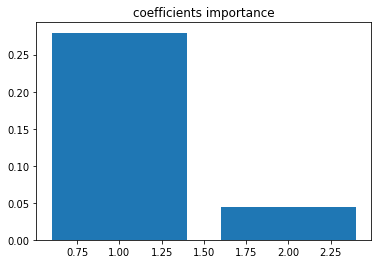

In [376]:
#plot the coefficients importance
ax = plt.subplot()
plt.bar([1, 2], coefficients)
plt.title('coefficients importance')
plt.show()

As we can see from above the gender has way higher importance then age in terms of death rate of recent outbreak of corona virus, That is to say, man are way more vernurable then women in this disease. however due to lack of sufficent data, we need more data to be more certain on the predictions

In [377]:
model.predict_proba([[0, 80]])

array([[0.86287834, 0.13712166]])

In [378]:
# Using LinearSVC
model_svc = LinearSVC()
model_svc.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [379]:
model_svc.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [380]:
model_svc.score(x_test, y_test)

#the prediction accuracy is very high that is 91 percent, however we can clearly see from the prediction array that almos
#all the predictions are zeros.
#possible reason can be relatively small dataset, so that there is not much relavence for the model to find

0.9166666666666666

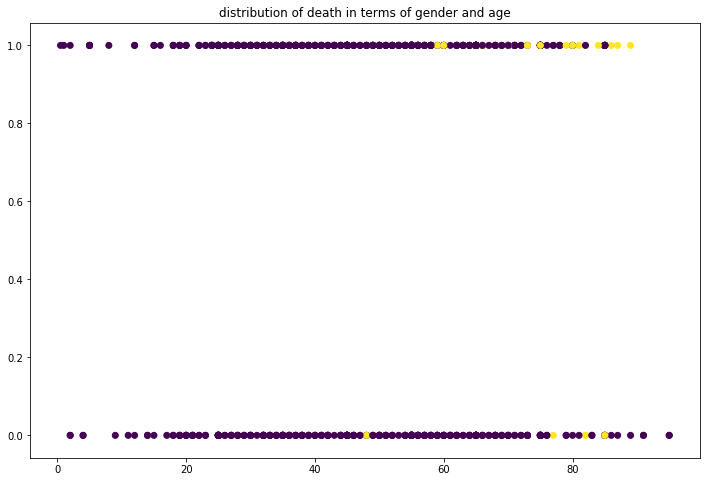

In [381]:
#visualization of datasets
plt.figure(figsize=(12,8))
plt.scatter(x_train.Age, x_train.Gender, c=y_train)
plt.title('distribution of death in terms of gender and age')
plt.show()